# РК-2
Технологии Машинного Обучения
Успенский Даниил Андреевич, ИУ5-61Б, Вариант 19


**Импорт библиотек и данных**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold,RFECV
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,RepeatedStratifiedKFold,StratifiedKFold
from imblearn.over_sampling import SMOTE

startup_df = pd.read_csv("../input/startup-investments-crunchbase/investments_VC.csv", delimiter=',', header = 0, encoding = "ISO-8859-1",skipinitialspace=True)
startup_df = startup_df.rename(columns={'market ': 'market', 'funding_total_usd ': 'funding_total_usd'})


**Первичный анализ данных**

In [2]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4   market                45470 non-null  object 
 5   funding_total_usd     49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [3]:

format_date = ('founded_at','first_funding_at','last_funding_at')
for i in format_date:
  startup_df[i] = pd.to_datetime(startup_df[i], format = '%Y-%m-%d', errors = 'coerce')

In [4]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   permalink             49438 non-null  object        
 1   name                  49437 non-null  object        
 2   homepage_url          45989 non-null  object        
 3   category_list         45477 non-null  object        
 4   market                45470 non-null  object        
 5   funding_total_usd     49438 non-null  object        
 6   status                48124 non-null  object        
 7   country_code          44165 non-null  object        
 8   state_code            30161 non-null  object        
 9   region                44165 non-null  object        
 10  city                  43322 non-null  object        
 11  funding_rounds        49438 non-null  float64       
 12  founded_at            38553 non-null  datetime64[ns]
 13  founded_month   

In [5]:
startup_df.describe()

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


**Подготовка данных**

In [6]:
startup_df.head(1)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:

startup_df['age_first_funding'] = (startup_df['first_funding_at']-startup_df['founded_at'])/pd.Timedelta(days=365)
startup_df['age_last_funding'] = (startup_df['last_funding_at']-startup_df['founded_at'])/pd.Timedelta(days=365)
startup_df['founded_month'] = pd.DatetimeIndex(startup_df['founded_at']).month
startup_df['founded_quarter'] = pd.DatetimeIndex(startup_df['founded_at']).quarter


In [8]:
startup_df.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
market                   8824
funding_total_usd        4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15741
founded_month           15741
founded_quarter         15741
founded_year            15812
first_funding_at         4866
last_funding_at          4862
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

In [9]:

startup_df = startup_df.drop(startup_df[
                                        (
                                        (startup_df['status'].isna())|
                                        (startup_df['founded_month'].isna())|
                                        (startup_df['founded_year'].isna())|
                                        (startup_df['market'].isna())|
                                        (startup_df['country_code'].isna())|
                                        (startup_df['funding_total_usd'].isna())|
                                        (startup_df['age_first_funding'].isna())
                                        )
                                        ].index)

startup_df.shape

(33147, 41)

In [10]:


startup_df.isnull().sum()

permalink                  0
name                       0
homepage_url            1621
category_list              0
market                     0
funding_total_usd          0
status                     0
country_code               0
state_code              9909
region                     0
city                     387
funding_rounds             0
founded_at                 0
founded_month              0
founded_quarter            0
founded_year               0
first_funding_at           0
last_funding_at            0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
angel                      0
grant                      0
private_equity             0
post_ipo_equity            0
post_ipo_debt              0
secondary_market           0
product_crowdfunding       0
round_A                    0
round_B                    0
round_C                    0
round_D       

In [11]:

startup_df = startup_df.drop(
    [
     'permalink'
#     ,'name'
     ,'homepage_url'
     ,'state_code'
     ,'region'
     ,'city'
     ,'founded_at'
     ,'first_funding_at'
     ,'funding_total_usd'
     ,'last_funding_at'
     ,'category_list'
     ], axis = 1)

In [12]:
startup_df = startup_df.drop_duplicates()
startup_df.shape

(33147, 31)

In [13]:
print('Before')
display(startup_df.groupby('status').agg({'country_code':'count'}).sort_values(by=['status'], ascending = False))
StatusDict = {"closed":0,"acquired":1}

startup_df = startup_df[(startup_df['status'] == 'acquired') | (startup_df['status'] == 'closed')]
startup_df["status_binary"] = startup_df["status"].map(StatusDict)
startup_df = startup_df.drop(['status'], axis = 1)

print('After')
display(startup_df.groupby('status_binary').agg({'country_code':'count'}).sort_values(by=['status_binary'], ascending = True))


Before


,country_code
status,
operating,28667
closed,1717
acquired,2763


After


,country_code
status_binary,
0,1717
1,2763


In [14]:

startup_df['total_investment'] = startup_df['seed'] + startup_df['venture'] +startup_df['equity_crowdfunding'] + startup_df['undisclosed'] + startup_df['convertible_note'] + startup_df['debt_financing'] + startup_df['angel'] + startup_df['grant'] + startup_df['private_equity'] + startup_df['post_ipo_equity'] + startup_df['post_ipo_debt'] + startup_df['secondary_market'] + startup_df['product_crowdfunding']

startup_df['total_investment'].describe()



count    4.480000e+03
mean     1.654188e+07
std      9.863946e+07
min      0.000000e+00
25%      3.000000e+05
50%      3.366250e+06
75%      1.440000e+07
max      5.700000e+09
Name: total_investment, dtype: float64

In [15]:
max(startup_df['total_investment'])

5700000000.0

In [17]:
startup_df.shape

(4480, 32)

**Суммирование и округление**

In [19]:
top20_markets = startup_df['market'].value_counts()[:20].keys().tolist()
startup_df['market'] = startup_df['market'].apply(lambda i: i if i in top20_markets else 'Other')

In [20]:


startup_df.loc[startup_df['age_first_funding'] < 0, 'age_first_funding'] = 0
startup_df.loc[startup_df['age_last_funding'] < 0, 'age_first_funding'] = 0

In [21]:


startup_df = startup_df[(startup_df['founded_year'] >= 1995.0 )]

**Географические данные**

In [22]:
startup_df = startup_df.drop(
    [
     'country_code'
     ,'name'
     ], axis = 1)

**Коллеряционная матрица**

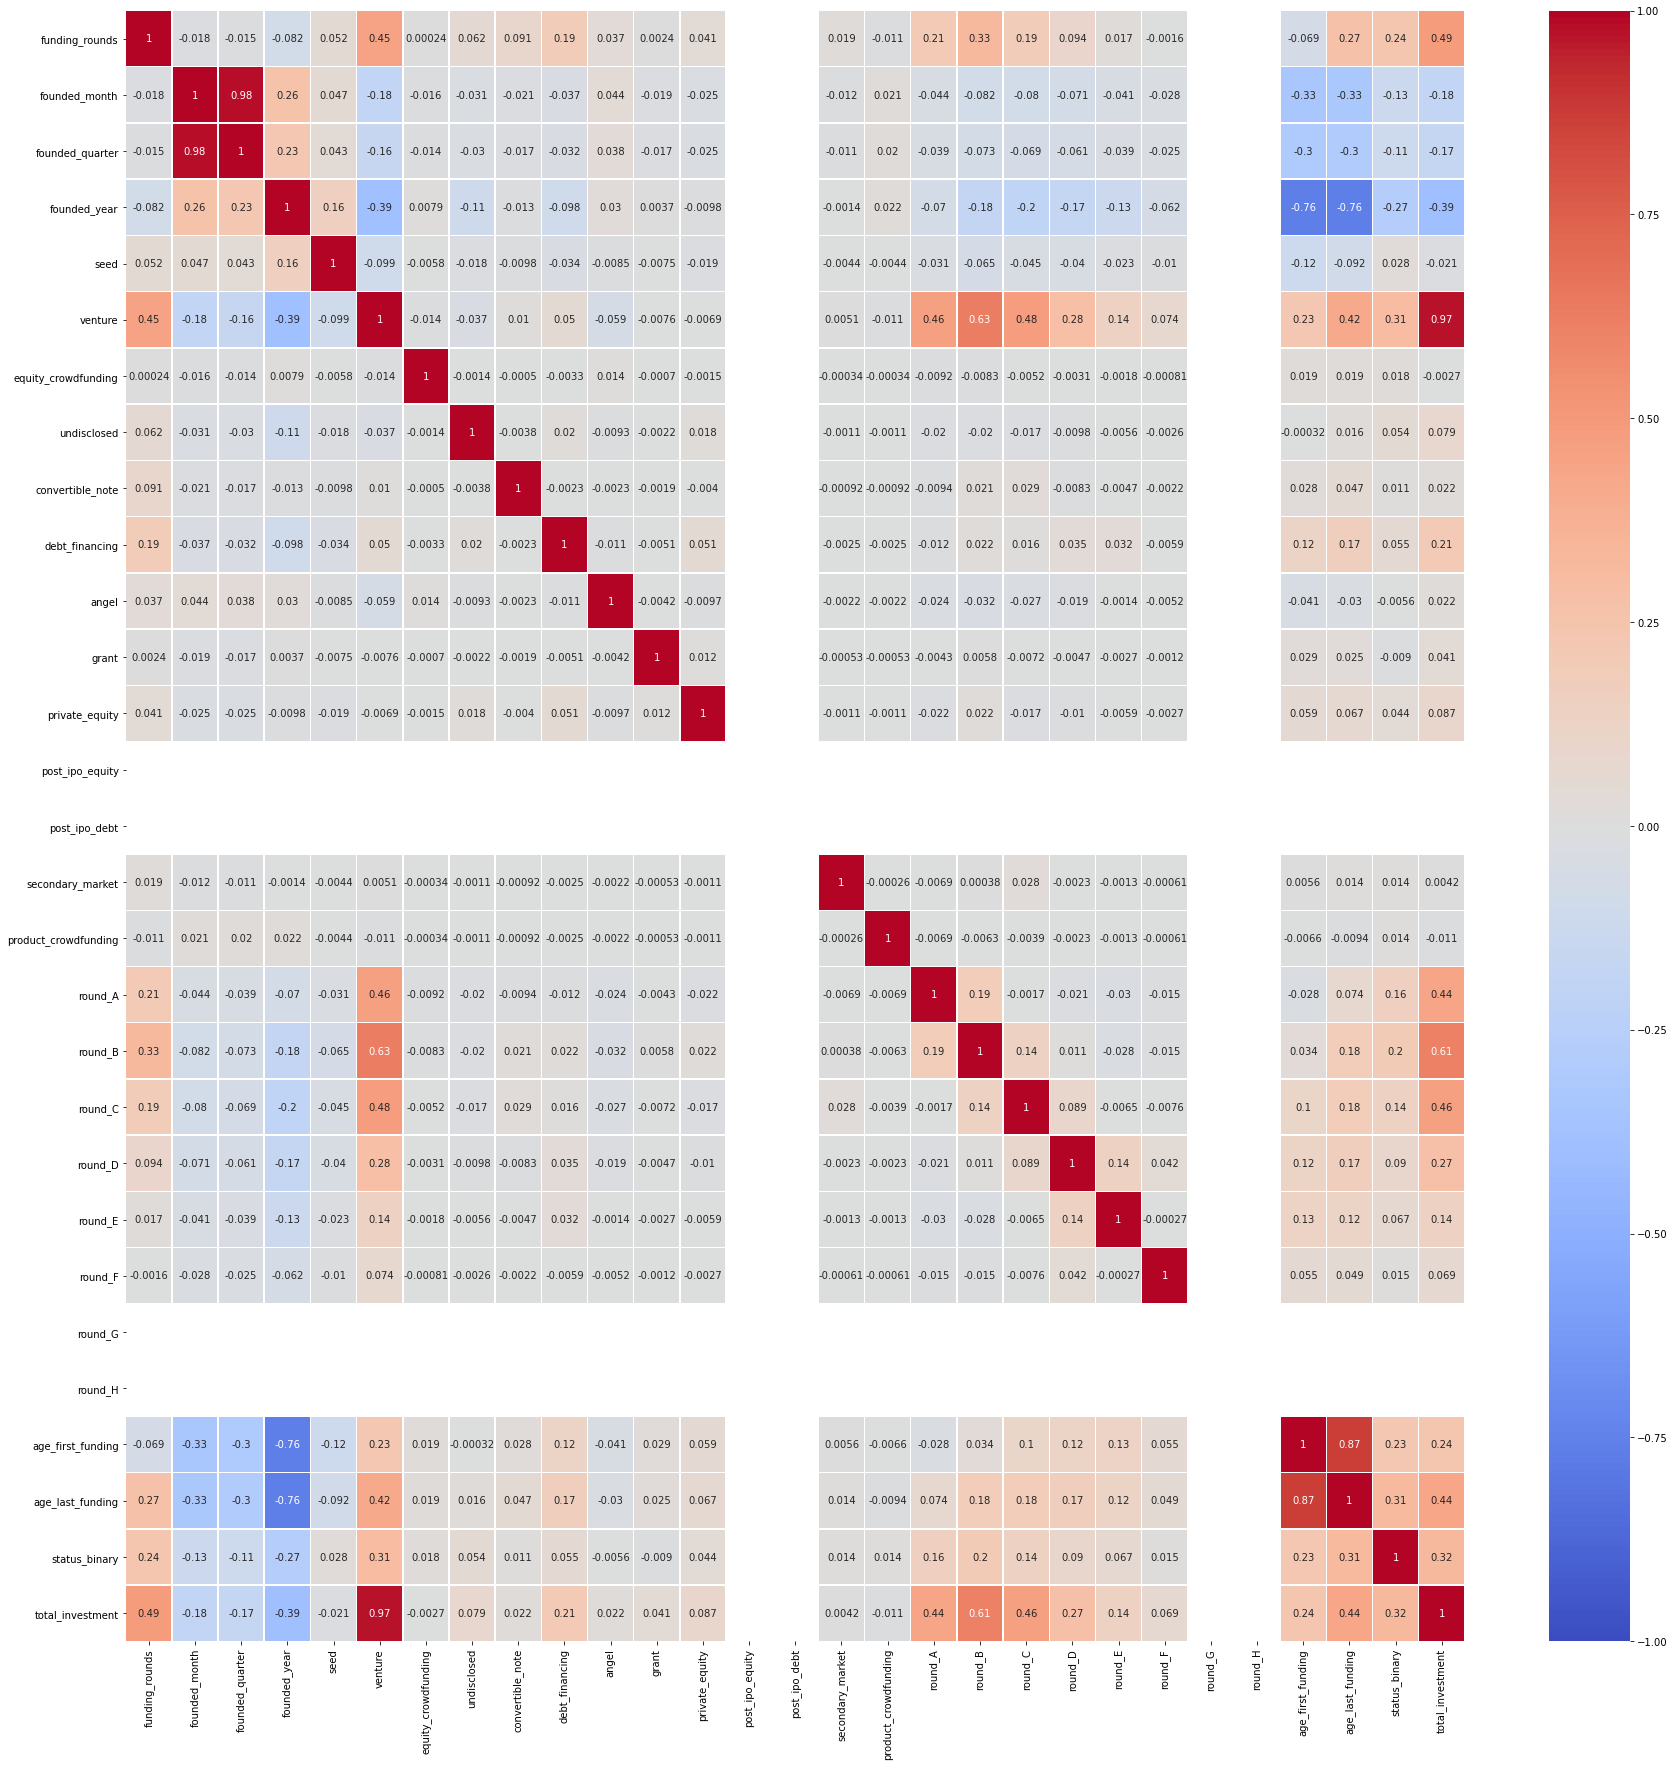

In [23]:
plt.figure(figsize=(30,30))
startup_heat = startup_df.corr()

startup_heat= sns.heatmap(startup_heat, annot=True,linewidth = 0.5, cmap='coolwarm', vmin=-1, vmax=1)

bottom, top = startup_heat.get_ylim()
startup_heat.set_ylim(bottom, top)

plt.show()

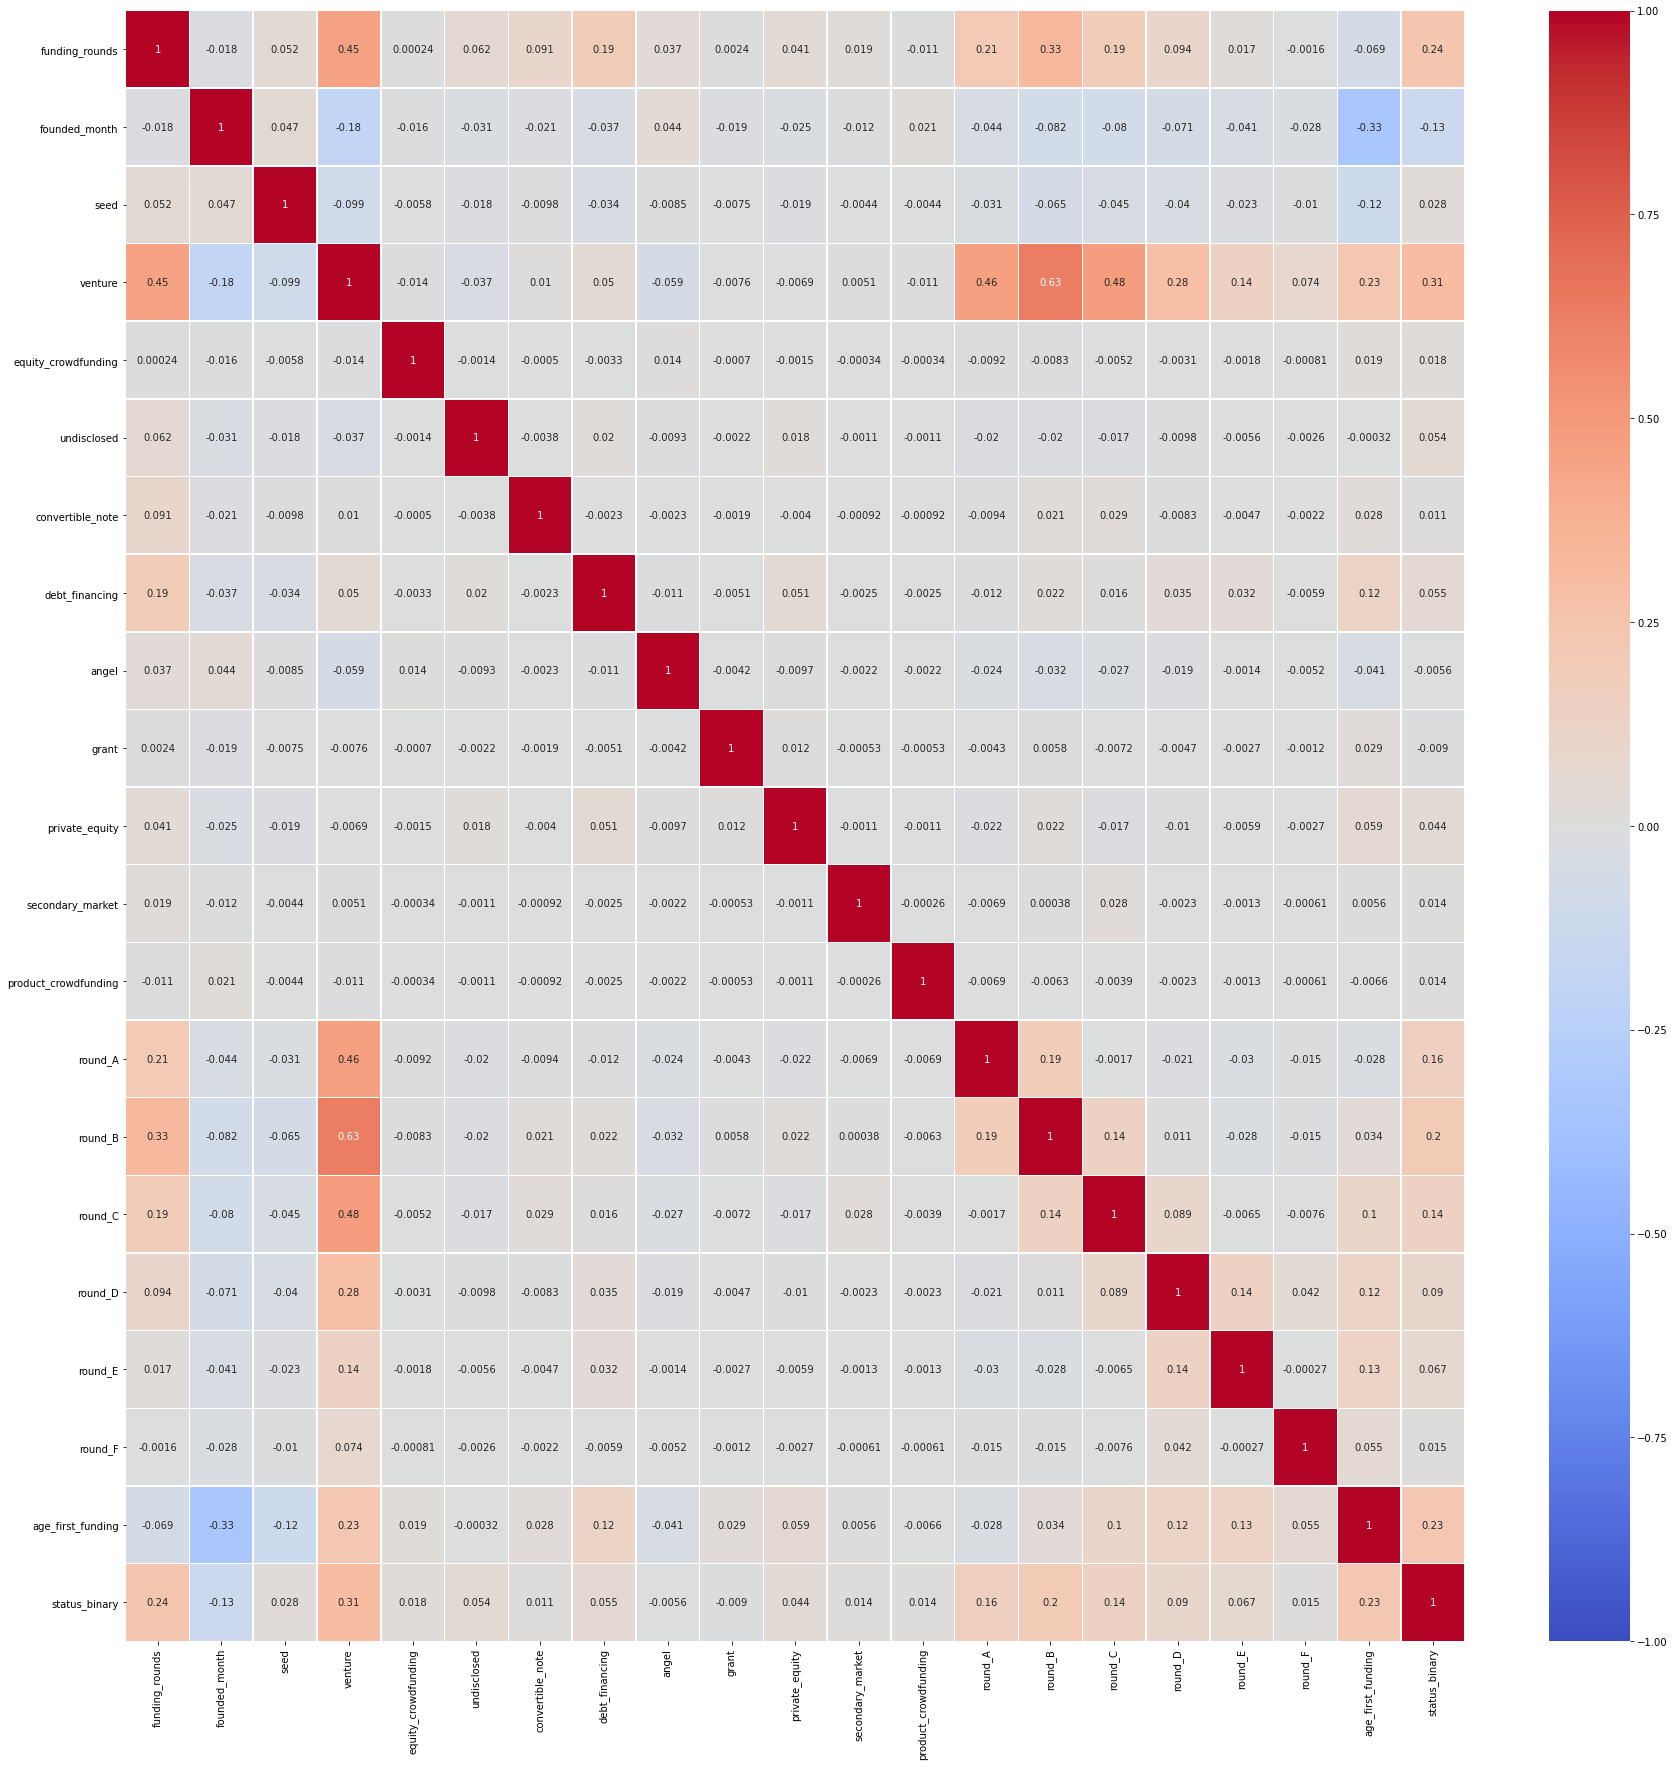

In [24]:

startup_df = startup_df.drop(
    [
     'post_ipo_equity'
     ,'post_ipo_debt'
     ,'round_G'
     ,'round_H'
     ,'founded_year'
     ,'founded_quarter'
     ,'total_investment'
     ,'age_last_funding'
     ], axis = 1)

plt.figure(figsize=(30,30))
startup_heat = startup_df.corr()

startup_heat= sns.heatmap(startup_heat, annot=True,linewidth = 0.5, cmap='coolwarm', vmin=-1, vmax=1)

bottom, top = startup_heat.get_ylim()
startup_heat.set_ylim(bottom, top)

plt.show()

**Предугадывание успешных стартапов**

In [26]:


modelling_df = startup_df
X = pd.get_dummies(modelling_df.drop(['status_binary'],axis = 1))
y = modelling_df['status_binary']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 10)

**Классификация при помощи метода случ. леса**

In [28]:

n = 10
while n <= 200:
  model = RandomForestClassifier(n_estimators=n)
  model.fit(X_train, y_train)
  print('{} - train score: {:.3f} | test score: {:.3f}'.format(n,model.score(X_train,y_train),model.score(X_test,y_test)))
  n = n+10

10 - train score: 0.975 | test score: 0.694
20 - train score: 0.988 | test score: 0.694
30 - train score: 0.990 | test score: 0.709
40 - train score: 0.992 | test score: 0.711
50 - train score: 0.992 | test score: 0.709
60 - train score: 0.992 | test score: 0.706
70 - train score: 0.992 | test score: 0.711
80 - train score: 0.992 | test score: 0.721
90 - train score: 0.992 | test score: 0.711
100 - train score: 0.992 | test score: 0.711
110 - train score: 0.992 | test score: 0.721
120 - train score: 0.992 | test score: 0.715
130 - train score: 0.992 | test score: 0.718
140 - train score: 0.992 | test score: 0.711
150 - train score: 0.992 | test score: 0.711
160 - train score: 0.992 | test score: 0.715
170 - train score: 0.992 | test score: 0.708
180 - train score: 0.992 | test score: 0.710
190 - train score: 0.992 | test score: 0.715
200 - train score: 0.992 | test score: 0.721


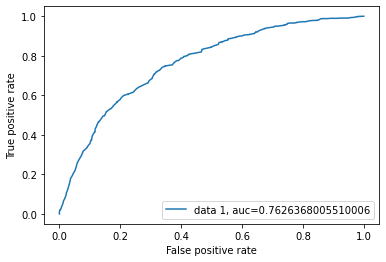

In [29]:
model = RandomForestClassifier(n_estimators=110) 
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test) [:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

**Улучшение модели**

In [30]:
result = permutation_importance(model, X_train, y_train, n_repeats=10,random_state=0)
fimp = pd.Series(result.importances_mean,index=X_train.columns.values).sort_values(ascending=False)
fimp

venture                        0.181195
age_first_funding              0.180039
founded_month                  0.102004
funding_rounds                 0.099075
seed                           0.079653
round_A                        0.043931
market_Other                   0.040424
round_B                        0.036301
angel                          0.025973
debt_financing                 0.016185
market_Software                0.016108
market_Curated Web             0.013025
round_C                        0.010482
market_Mobile                  0.010443
market_Biotechnology           0.010173
market_Games                   0.009711
market_Enterprise Software     0.007630
market_Advertising             0.006166
market_Social Media            0.005588
round_D                        0.004355
market_Hardware + Software     0.004200
market_E-Commerce              0.004123
market_Semiconductors          0.003430
market_Clean Technology        0.003237
market_Web Hosting             0.002852


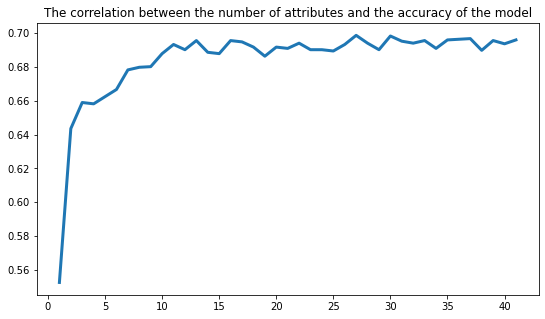

In [31]:
rfecv = RFECV(estimator=model, step=1,cv=StratifiedKFold(10),scoring='accuracy')
rfecv.fit(X_train,y_train)

plt.figure(figsize=(9,5))
plt.plot(range(1, len(rfecv.grid_scores_)+1),rfecv.grid_scores_,linewidth=3)
plt.title('The correlation between the number of attributes and the accuracy of the model')
plt.show()



In [32]:
X_train.columns[np.where(rfecv.support_ == False)[0]]

Index(['equity_crowdfunding', 'convertible_note', 'private_equity',
       'secondary_market', 'product_crowdfunding', 'round_E', 'round_F',
       'market_Education ', 'market_Health Care ', 'market_Messaging ',
       'market_Search ', 'market_Security ', 'market_Semiconductors ',
       'market_Web Hosting '],
      dtype='object')

In [33]:
X.drop(X_train.columns[np.where(rfecv.support_ == False)[0]],axis=1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=110)

In [34]:
result = permutation_importance(model, X_train, y_train, n_repeats=10,random_state=0)
fimp = pd.Series(result.importances_mean,index=X_train.columns.values).sort_values(ascending=False)
fimp

age_first_funding              0.189865
venture                        0.181118
funding_rounds                 0.125819
founded_month                  0.095607
seed                           0.080231
market_Other                   0.052832
round_A                        0.045549
angel                          0.029827
round_B                        0.027900
market_Software                0.018805
debt_financing                 0.017495
market_Curated Web             0.015530
round_C                        0.009634
market_Mobile                  0.009595
market_Social Media            0.008555
market_Games                   0.008054
market_Biotechnology           0.006705
market_Enterprise Software     0.005703
market_Hardware + Software     0.005010
market_E-Commerce              0.004740
market_Advertising             0.004740
market_Clean Technology        0.004239
round_D                        0.003391
market_Finance                 0.002235
grant                          0.001541


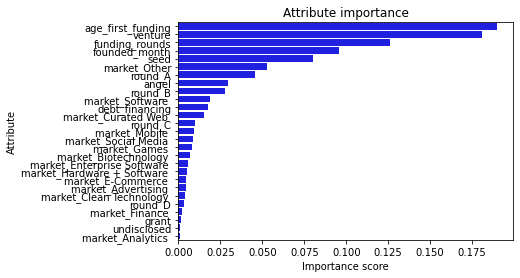

In [35]:
sns.barplot(x=fimp, y=fimp.index, color='b')
plt.rcParams['figure.figsize'] = 6,15
plt.xlabel('Importance score')
plt.ylabel('Attribute')
plt.title('Attribute importance')

plt.show()

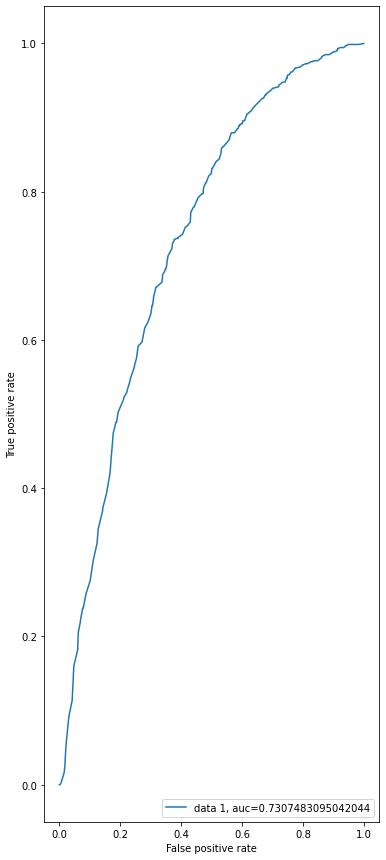

In [36]:
y_pred_proba = model.predict_proba(X_test) [:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

In [37]:
cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cross_val, n_jobs=-1, error_score='raise')
# report performance
print('Average score of 5 run with a stratified 10 Kfold is {:.3f} with a standard deviation of: {:.3f}'.format(np.mean(scores)*100, np.std(scores)))

Average score of 5 run with a stratified 10 Kfold is 71.692 with a standard deviation of: 0.024


In [38]:

pred = X_test.sample(n=1)
outcome = model.predict(pred)
print('Predicted Class: {}'.format(outcome[0]))

if outcome == 1:
  print('This startup is predicted to be successful by {:.1f}%'.format(np.mean(scores)*100)) 
  display(pred)
elif outcome == 0:
  print('This startup is predicted NOT to be successful by {:.1f}%'.format(np.mean(scores)*100)) 
  display(pred)

Predicted Class: 0
This startup is predicted NOT to be successful by 71.7%


,funding_rounds,founded_month,seed,venture,undisclosed,debt_financing,angel,grant,round_A,round_B,...,market_Curated Web,market_E-Commerce,market_Enterprise Software,market_Finance,market_Games,market_Hardware + Software,market_Mobile,market_Other,market_Social Media,market_Software
30028,1.0,6.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


**Логистическая регрессия**

In [39]:
X = pd.get_dummies(modelling_df.drop(['status_binary'],axis = 1))
y = modelling_df['status_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

logreg = LogisticRegressionCV(max_iter=10000, scoring='roc_auc')
logreg.fit(X_train,y_train)

print('The training model accuracy: {:.4}'.format(logreg.score(X_train,y_train)))
print('The test model accuracy: {:.4}'.format(logreg.score(X_test,y_test)))

The training model accuracy: 0.7238
The test model accuracy: 0.7528


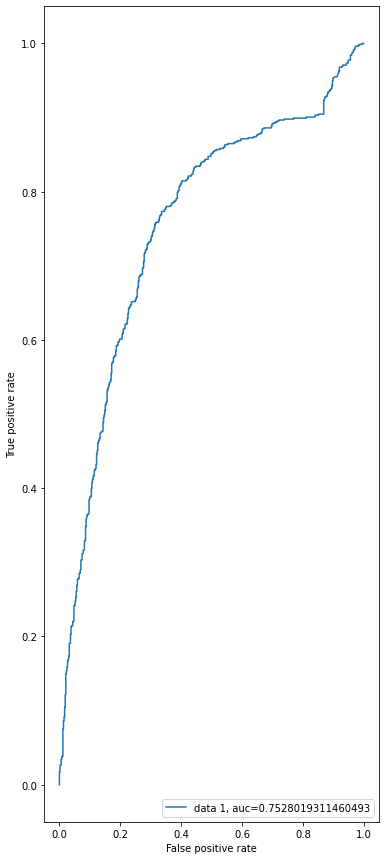

In [40]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

##### 4.1.1 Model tuning

In [41]:
logreg = LogisticRegressionCV(max_iter=10000,scoring='roc_auc',class_weight='balanced')
logreg.fit(X_train,y_train)

print('The training model accuracy: {:.4}'.format(logreg.score(X_train,y_train)))
print('The test model accuracy: {:.4}'.format(logreg.score(X_test,y_test)))

The training model accuracy: 0.7255
The test model accuracy: 0.7503


In [42]:

logreg = LogisticRegressionCV(penalty='l1', solver='liblinear',scoring='roc_auc',class_weight='balanced', max_iter=100000)
logreg.fit(X_train,y_train)

print('The training model accuracy: {:.4}'.format(logreg.score(X_train,y_train)))
print('The test model accuracy: {:.4}'.format(logreg.score(X_test,y_test)))

The training model accuracy: 0.7504
The test model accuracy: 0.7836


In [43]:

logreg = LogisticRegressionCV(penalty='l1', solver='liblinear', max_iter=10000,scoring='roc_auc')
logreg.fit(X_train,y_train)

print('The training model accuracy: {:.4}'.format(logreg.score(X_train,y_train)))
print('The test model accuracy: {:.4}'.format(logreg.score(X_test,y_test)))

The training model accuracy: 0.7597
The test model accuracy: 0.7924


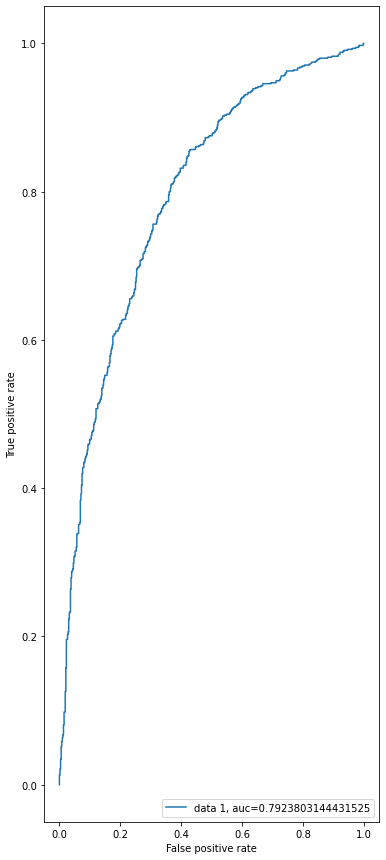

In [44]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

**Оценка полученных данных**

In [45]:
modelling_df.groupby('status_binary').agg({'status_binary':'count'})

,status_binary
status_binary,
0,1619
1,2255


In [46]:
modelling_df = startup_df
X = pd.get_dummies(modelling_df.drop(['status_binary'],axis = 1))
y = modelling_df['status_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 0)



In [48]:
os_y

0       0
1       1
2       1
3       0
4       0
       ..
2997    0
2998    0
2999    0
3000    0
3001    0
Name: status_binary, Length: 3002, dtype: int64

##### 5.3 Random forrest w. balanced data

In [50]:
X = os_X
y = os_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 0)

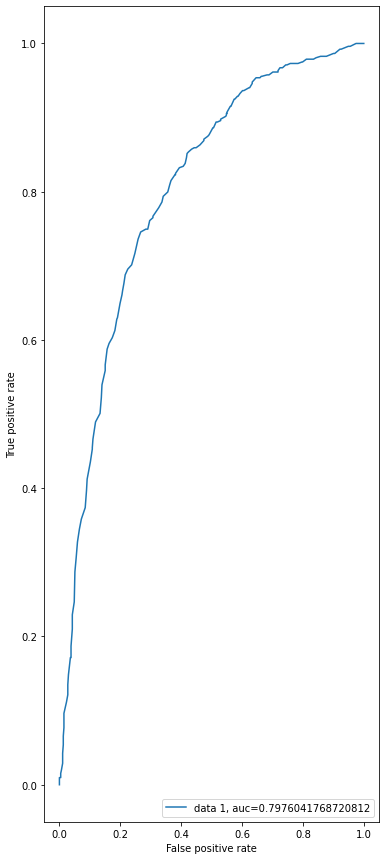

In [51]:
model = RandomForestClassifier(n_estimators=110) 
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test) [:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

##### 5.2 Logistic regression w. balanced data

In [52]:
logreg = LogisticRegressionCV(penalty='l1', solver='liblinear', max_iter=10000, scoring='roc_auc')
logreg.fit(os_X,os_y)

print('The training model accuracy (balanced): {:.4} %'.format(logreg.score(os_X,os_y)*100))
print('The test model accuracy: {:.4}'.format(logreg.score(X_test,y_test)*100))

The training model accuracy (balanced): 81.87 %
The test model accuracy: 81.42


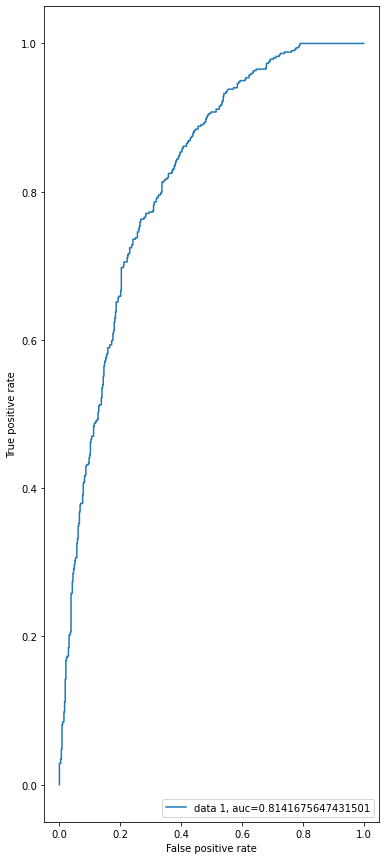

In [53]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

###**5. Deployment**
The deployment of a random forrest model to classify successfull startups.


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 0)

model.fit(X_train, y_train)
pred = X_test.sample(n=1)
outcome = model.predict(pred)

y_pred_proba = model.predict_proba(X_test) [:,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)

print('Predicted Class: {}'.format(outcome[0]))

if outcome == 1:
  print('This startup is predicted to be successful by {:.1f}%'.format(auc*100)) 
  display(pred)
elif outcome == 0:
  print('This startup is predicted NOT to be successful by {:.1f}%'.format(auc*100)) 
  display(pred)



Predicted Class: 0
This startup is predicted NOT to be successful by 79.5%


,funding_rounds,founded_month,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,market_Health Care,market_Messaging,market_Mobile,market_Other,market_Search,market_Security,market_Semiconductors,market_Social Media,market_Software,market_Web Hosting
2263,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
prod_dict = {'funding_rounds':              [2.0]
            ,'founded_month':               [1.0]
            ,'seed':                        [0.0]
            ,'venture':                     [15000000.0]
            ,'equity_crowdfunding':         [0.0]
            ,'undiscolsed':                 [0.0]
            ,'convertible_note':            [0.0]
            ,'debt_financing':              [0.0]
            ,'angel':                       [0.0]
            ,'grant':                       [0.0]
            ,'private equity':              [0.0]
            ,'secondary_market':            [0.0]
            ,'product_crowdfunding':        [0.0]
            ,'round_A':                     [5000000.0]
            ,'round_B':                     [10000000.0]
            ,'round_C':                     [0.0]
            ,'round_D':                     [0.0]
            ,'round_E':                     [0.0]
            ,'round_F':                     [0.0]
            ,'age_first_funding':           [1.0]
            ,'market_Advertising':          [0.0]
            ,'market_Analytics ':           [0.0]
            ,'market_Biotechnology ':       [0.0]
            ,'market_Clean Technology ':    [0.0]
            ,'market_Curated Web ':         [0.0]
            ,'market_E-Commerce ':          [0.0]
            ,'market_Education':            [0.0]
            ,'market_Enterprise Software ': [0.0]
            ,'market_Finance ':             [0.0]
            ,'market_Games ':               [0.0]
            ,'market_Hardware + Software ': [0.0]
            ,'market_Health care ':         [0.0] 
            ,'market_Messaging ':           [0.0]
            ,'market_Mobile ':              [0.0]
            ,'market_Other':                [0.0]
            ,'market_Search ':              [0.0]
            ,'market_Security':             [0.0]
            ,'market_Semiconductors ':      [0.0]
            ,'market_Social Media ':        [0.0]
            ,'market_Software ':            [1.0]
            ,'market_Web Hosting ':         [0.0]
            }
prod_pred = pd.DataFrame(data=prod_dict)
outcome = model.predict(prod_pred)

print('Predicted Class: {}'.format(outcome[0]))

if outcome == 1:
  print('This startup is predicted to be successful by {:.1f}%'.format(auc*100)) 
elif outcome == 0:
  print('This startup is predicted NOT to be successful by {:.1f}%'.format(auc*100)) 
display(prod_pred)

Predicted Class: 1
This startup is predicted to be successful by 79.5%


,funding_rounds,founded_month,seed,venture,equity_crowdfunding,undiscolsed,convertible_note,debt_financing,angel,grant,...,market_Health care,market_Messaging,market_Mobile,market_Other,market_Search,market_Security,market_Semiconductors,market_Social Media,market_Software,market_Web Hosting
0,2.0,1.0,0.0,15000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Slack software

In [56]:
prod_dict = {'funding_rounds':              [6.0]
            ,'founded_month':               [1.0]
            ,'seed':                        [1500000.0]
            ,'venture':                     [178450000.0]
            ,'equity_crowdfunding':         [0.0]
            ,'undiscolsed':                 [0.0]
            ,'convertible_note':            [0.0]
            ,'debt_financing':              [0.0]
            ,'angel':                       [0.0]
            ,'grant':                       [0.0]
            ,'private equity':              [0.0]
            ,'secondary_market':            [0.0]
            ,'product_crowdfunding':        [0.0]
            ,'round_A':                     [5000000.0]
            ,'round_B':                     [10700000.0]
            ,'round_C':                     [42750000.0]
            ,'round_D':                     [120000000.0]
            ,'round_E':                     [0.0]
            ,'round_F':                     [0.0]
            ,'age_first_funding':           [0.0]
            ,'market_Advertising':          [0.0]
            ,'market_Analytics ':           [0.0]
            ,'market_Biotechnology ':       [0.0]
            ,'market_Clean Technology ':    [0.0]
            ,'market_Curated Web ':         [0.0]
            ,'market_E-Commerce ':          [0.0]
            ,'market_Education':            [0.0]
            ,'market_Enterprise Software ': [1.0]
            ,'market_Finance ':             [0.0]
            ,'market_Games ':               [0.0]
            ,'market_Hardware + Software ': [0.0]
            ,'market_Health care ':         [0.0] 
            ,'market_Messaging ':           [0.0]
            ,'market_Mobile ':              [0.0]
            ,'market_Other':                [0.0]
            ,'market_Search ':              [0.0]
            ,'market_Security':             [0.0]
            ,'market_Semiconductors ':      [0.0]
            ,'market_Social Media ':        [0.0]
            ,'market_Software ':            [0.0]
            ,'market_Web Hosting ':         [0.0]
            }
prod_pred = pd.DataFrame(data=prod_dict)
outcome = model.predict(prod_pred)

print('Predicted Class: {}'.format(outcome[0]))

if outcome == 1:
  print('This startup is predicted to be successful by {:.1f}%'.format(auc*100)) 
elif outcome == 0:
  print('This startup is predicted NOT to be successful by {:.1f}%'.format(auc*100)) 
display(prod_pred)

Predicted Class: 1
This startup is predicted to be successful by 79.5%


,funding_rounds,founded_month,seed,venture,equity_crowdfunding,undiscolsed,convertible_note,debt_financing,angel,grant,...,market_Health care,market_Messaging,market_Mobile,market_Other,market_Search,market_Security,market_Semiconductors,market_Social Media,market_Software,market_Web Hosting
0,6.0,1.0,1500000.0,178450000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
prod_dict = {'funding_rounds':              [11.0]
            ,'founded_month':               [1.0]
            ,'seed':                        [0.0]
            ,'venture':                     [188799995.0]
            ,'equity_crowdfunding':         [0.0]
            ,'undiscolsed':                 [0.0]
            ,'convertible_note':            [0.0]
            ,'debt_financing':              [93000000.0]
            ,'angel':                       [0.0]
            ,'grant':                       [0.0]
            ,'private equity':              [237000000.0]
            ,'secondary_market':            [0.0]
            ,'product_crowdfunding':        [0.0]
            ,'round_A':                     [5000000.0]
            ,'round_B':                     [70000000.0]
            ,'round_C':                     [0.0]
            ,'round_D':                     [0.0]
            ,'round_E':                     [63999995.0]
            ,'round_F':                     [0.0]
            ,'age_first_funding':           [7.95]
            ,'market_Advertising':          [0.0]
            ,'market_Analytics ':           [0.0]
            ,'market_Biotechnology ':       [0.0]
            ,'market_Clean Technology ':    [0.0]
            ,'market_Curated Web ':         [0.0]
            ,'market_E-Commerce ':          [0.0]
            ,'market_Education':            [0.0]
            ,'market_Enterprise Software ': [0.0]
            ,'market_Finance ':             [0.0]
            ,'market_Games ':               [0.0]
            ,'market_Hardware + Software ': [0.0]
            ,'market_Health care ':         [0.0] 
            ,'market_Messaging ':           [0.0]
            ,'market_Mobile ':              [0.0]
            ,'market_Other':                [1.0]
            ,'market_Search ':              [0.0]
            ,'market_Security':             [0.0]
            ,'market_Semiconductors ':      [0.0]
            ,'market_Social Media ':        [0.0]
            ,'market_Software ':            [0.0]
            ,'market_Web Hosting ':         [0.0]
            }
prod_pred = pd.DataFrame(data=prod_dict)
outcome = model.predict(prod_pred)

print('Predicted Class: {}'.format(outcome[0]))

if outcome == 1:
  print('This startup is predicted to be successful by {:.1f}%'.format(auc*100)) 
elif outcome == 0:
  print('This startup is predicted NOT to be successful by {:.1f}%'.format(auc*100)) 
display(prod_pred)

Predicted Class: 1
This startup is predicted to be successful by 79.5%


,funding_rounds,founded_month,seed,venture,equity_crowdfunding,undiscolsed,convertible_note,debt_financing,angel,grant,...,market_Health care,market_Messaging,market_Mobile,market_Other,market_Search,market_Security,market_Semiconductors,market_Social Media,market_Software,market_Web Hosting
0,11.0,1.0,0.0,188799995.0,0.0,0.0,0.0,93000000.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
